In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset
df = pd.read_csv("janaki-ram2.csv", header=0)

# Combine all text columns into a single corpus
corpus = df['industry_type'] + ' ' + df['department'] + ' ' + df['role_category'] + ' ' + df['key_skills']


In [ ]:
unique_values_list = df['industry_type'].unique().tolist()
print(unique_values_list)
print(len(unique_values_list))

['accounting / auditing', 'advertising & marketing', 'agriculture / forestry / fishing', 'analytics / kpo / research', 'animation & vfx', 'architecture / interior design', 'auto components', 'automobile', 'aviation', 'banking', 'beauty & personal care', 'beverage', 'biotechnology', 'bpo / call centre', 'building material', 'chemicals', 'clinical research / contract research', 'consumer electronics & appliances', 'content development / language', 'courier / logistics', 'defence & aerospace', 'design', 'education / training', 'e-learning / edtech', 'electrical equipment', 'electronic components / semiconductors', 'electronics manufacturing', 'emerging technologies', 'engineering & construction', 'events / live entertainment', 'facility management services', 'fertilizers / pesticides / agro chemicals', 'film / music / entertainment', 'financial services', 'fintech / payments', 'fitness & wellness', 'fmcg', 'food processing', 'furniture & furnishing', 'gaming', 'gems & jewellery', 'governm

In [ ]:
unique_values_list = df['department'].unique().tolist()
print(unique_values_list)
print(len(unique_values_list))

['finance & accounting', 'product management', 'other', 'sales & business development', 'teaching & training', 'consulting', 'bfsi, investments & trading', 'marketing & communication', 'legal & regulatory', 'it & information security', 'engineering - software & qa', 'data science & analytics', 'project & program management', 'customer success, service & operations', 'content, editorial & journalism', 'human resources', 'ux, design & architecture', 'procurement & supply chain', 'research & development', 'administration & facilities', 'engineering - hardware & networks', 'risk management & compliance', 'strategic & top management', 'media production & entertainment', 'healthcare & life sciences', 'construction & site engineering', 'environment health & safety', 'production, manufacturing & engineering', 'quality assurance', 'csr & social service', 'merchandising, retail & ecommerce', 'aviation & aerospace', 'security services', 'food, beverage & hospitality', 'sports, fitness & personal 

In [ ]:
unique_values_list = df['role_category'].unique().tolist()
print(unique_values_list)
print(len(unique_values_list))

['finance', 'accounting & taxation', 'product management - technology', 'finance & accounting - other', 'other', 'bd / pre sales', 'administration & staff', 'management consulting', 'investment banking, private equity & vc', 'enterprise & b2b sales', 'digital marketing', 'corporate affairs', 'it infrastructure services', 'it consulting', 'software development', 'dba / data warehousing', 'data science & analytics - other', 'technology / it', 'operations', 'audit & control', 'content management (print / online / electronic)', 'it security', 'trading, asset & wealth management', 'human resources - other', 'business intelligence & analytics', 'ui / ux', 'procurement & purchase', 'operations support', 'banking operations', 'life insurance', 'treasury & forex', 'treasury', 'research & development - other', 'general insurance', 'quality assurance and testing', 'administration', 'it network', 'it & information security - other', 'other consulting', 'risk management & compliance - other', 'mark

In [ ]:
unique_values_list = df['key_skills'].unique().tolist()
print(unique_values_list)
print(len(unique_values_list))

["['investment banking', 'ca ', 'advanced excel', 'financial modeling', 'chartered accountant', 'corporate finance', 'accounting', 'finance', 'ca']", "['us tax', '1120 ric', 'mutual funds']", "['tds', 'direct tax', 'litigation', 'tax advisory', 'ca', 'domestic tax', 'tally software', 'charatered accountant', 'appeals', 'litigations', 'tax litigation', 'transfer pricing', 'tax audit', 'international taxation', 'outbound tax', 'inbound tax', 'direct tax litigation']", "['business process', 'associate operations', 'change management', 'team management', 'consulting', 'manager technology', 'gap analysis', 'hr', 'talent management', 'performance improvement']", "['analytical skills', 'due diligence', 'financial reporting', 'networking', 'financial analysis', 'accounting', 'gaap', 'microsoft', 'mergers and acquisitions', 'advisory']", "['due diligence', 'leadership development', 'financial reporting', 'networking', 'financial analysis', 'accounting', 'gaap', 'risk management', 'microsoft', '

In [ ]:
unique_values_list = df['role'].unique().tolist()
print(unique_values_list)
print(len(unique_values_list))

['finance executive', 'taxation executive', 'product operations associate / lead', 'finance & accounting - other', 'other', 'manager taxation', 'business development executive (bde)', 'financial analyst', 'chartered accountant (ca)', 'counselor', 'accountant / accounts executive', 'associate / consultant', 'investment banking, private equity & vc - other', 'accounting & taxation - other', 'finance - other', 'key account manager', 'social media marketing', 'corporate law', 'it audit', 'it consulting - other', 'data engineer', 'data warehouse architect / consultant', 'data science & analytics - other', 'technical consultant', 'head - finance & accounts', 'functional consultant', 'it project manager', 'operations manager', 'technical architect', 'technical lead', 'audit manager', 'content creation / writer', 'cyber security', 'manager - financial planning & analysis', 'research analyst', 'human resources - other', 'audit executive', 'database architect / designer', 'solution architect', '

In [ ]:
# Tokenize the corpus
tokenized_corpus = [text.split() for text in corpus]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Function to get embeddings for a document
def get_embeddings(doc):
    return sum([word2vec_model.wv[word] for word in doc])


In [ ]:
# Apply the function to each document in the corpus
document_embeddings = [get_embeddings(doc) for doc in tokenized_corpus]


In [ ]:
# Add the document embeddings as new features to the DataFrame
for i in range(100):
    df[f'embedding_{i}'] = [emb[i] for emb in document_embeddings]


<ipython-input-12-dd67cab2a94a>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'embedding_{i}'] = [emb[i] for emb in document_embeddings]


In [ ]:
# Drop the original text columns
df = df.drop(['industry_type', 'department', 'role_category', 'key_skills'], axis=1)


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('role', axis=1)
y = df['role']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
#Evaluate model performance

# Train Accuracy
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Test Accuracy (already defined)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class problems
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class problems
print("Recall Score:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class problems
print("F1 Score:", f1)

Train Accuracy: 0.996152652119922
Test Accuracy: 0.9951215185382296
Precision Score: 0.9954568416060753
Recall Score: 0.9951215185382296
F1 Score: 0.9950996644157704


In [ ]:
# Evaluate model performance (e.g., using accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9951215185382296


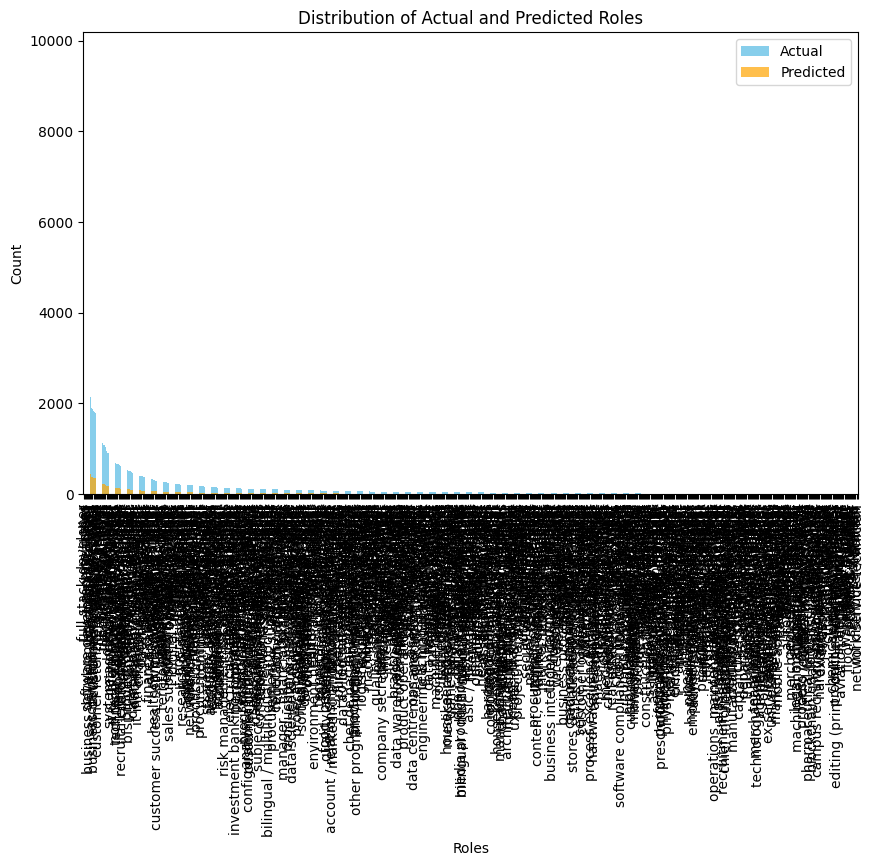

In [ ]:
# Visualize the distribution of predicted roles
plt.figure(figsize=(10, 6))
df['role'].value_counts().plot(kind='bar', color='skyblue', label='Actual')
pd.Series(y_pred).value_counts().plot(kind='bar', color='orange', alpha=0.7, label='Predicted')
plt.title('Distribution of Actual and Predicted Roles')
plt.xlabel('Roles')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
def preprocess_input(input_text):
    # Preprocess the input text
    tokenized_input = input_text.split()
    input_embeddings = get_embeddings(tokenized_input)
    return input_embeddings

def predict_role(input_text):
    # Preprocess input
    input_embeddings = preprocess_input(input_text)

    # Make prediction
    predicted_role = rf_model.predict([input_embeddings])
    return predicted_role[0]

# Get user input for industry type, department, role category, and key skills
industry_type = input("Enter industry type: ")
department = input("Enter department: ")
role_category = input("Enter role category: ")
key_skills = input("Enter key skills: ")

# Concatenate the inputs
user_input = industry_type + ' ' + department + ' ' + role_category + ' ' + key_skills

# Predict role
predicted_role = predict_role(user_input)
print("Predicted role:", predicted_role)

Enter industry type: it services & consulting
Enter department: data science & analytics
Enter role category: business intelligence & analytics
Enter key skills: ['operations manager', 'market intelligence', 'development lead', 'strategic business planning', 'data analytics', 'subject matter expertise', 'business intelligence', 'stakeholder management', 'microsoft', 'sql']
Predicted role: business analyst


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
